In [44]:
import pandas as pd
import numpy as np
import json
from glob import glob
import matplotlib.pyplot as plt

In [45]:
results = pd.DataFrame([json.load(open(file)) for file in glob("noisy_label_results/*.json")])
results["best_val_accuracy"] = results["val_categorical_accuracy"].apply(np.max)
results["best_val_loss"] = results["val_loss"].apply(np.min)
display(results.head())
display(results.columns)
display(results["noise"].value_counts())

,initial_rank,new_rank,rank_update_epoch,total_epochs,noise,loss,categorical_accuracy,val_loss,val_categorical_accuracy,pre_update_loss,pre_update_categorical_accuracy,pre_update_val_loss,pre_update_val_categorical_accuracy,post_update_loss,post_update_categorical_accuracy,post_update_val_loss,post_update_val_categorical_accuracy,best_val_accuracy,best_val_loss
0,200,14,2,50,0.2,"[1.9689738750457764, 1.771406650543213, 1.6970...","[0.3042999804019928, 0.40907999873161316, 0.44...","[1.6058043241500854, 1.3965593576431274, 1.305...","[0.4242999851703644, 0.5239999890327454, 0.564...",1.728277,0.43146,1.396559,0.5240,1.757425,0.41614,1.469864,0.5061,0.7351,0.871644
1,200,14,5,50,0.5,"[2.2181403636932373, 2.147829294204712, 2.1096...","[0.19538000226020813, 0.2567799985408783, 0.28...","[1.8492552042007446, 1.708907961845398, 1.6541...","[0.4162999987602234, 0.46230000257492065, 0.52...",2.033159,0.33860,1.543961,0.5948,2.043782,0.33356,1.566902,0.5889,0.6698,1.292781
2,200,14,25,50,0.2,"[1.9643635749816895, 1.7674204111099243, 1.677...","[0.30820000171661377, 0.4122599959373474, 0.46...","[1.5106420516967773, 1.3683947324752808, 1.240...","[0.4797999858856201, 0.5437999963760376, 0.589...",0.486330,0.86154,1.222980,0.6452,0.504015,0.85550,1.158452,0.6603,0.7426,0.856338
3,200,14,5,50,0.5,"[2.2161636352539062, 2.1445207595825195, 2.104...","[0.19467999041080475, 0.25553998351097107, 0.2...","[1.8740757703781128, 1.716734766960144, 1.6504...","[0.40070000290870667, 0.5044000148773193, 0.53...",2.030895,0.33486,1.498099,0.5896,2.038349,0.33320,1.514912,0.5897,0.6595,1.317942
4,200,14,2,50,0.2,"[1.9685289859771729, 1.768094539642334, 1.6920...","[0.3063800036907196, 0.41378000378608704, 0.45...","[1.5267717838287354, 1.3418643474578857, 1.258...","[0.4721999764442444, 0.5562999844551086, 0.580...",1.680302,0.45674,1.341865,0.5563,1.709154,0.44718,1.406315,0.5468,0.7413,0.829857


Index(['initial_rank', 'new_rank', 'rank_update_epoch', 'total_epochs',
       'noise', 'loss', 'categorical_accuracy', 'val_loss',
       'val_categorical_accuracy', 'pre_update_loss',
       'pre_update_categorical_accuracy', 'pre_update_val_loss',
       'pre_update_val_categorical_accuracy', 'post_update_loss',
       'post_update_categorical_accuracy', 'post_update_val_loss',
       'post_update_val_categorical_accuracy', 'best_val_accuracy',
       'best_val_loss'],
      dtype='object')

0.2    12
0.0    10
0.5     9
0.7     9
Name: noise, dtype: int64

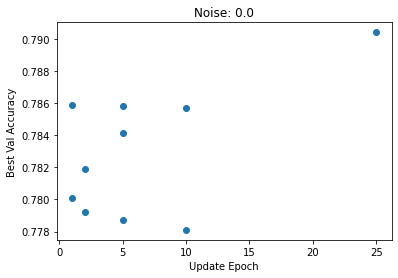

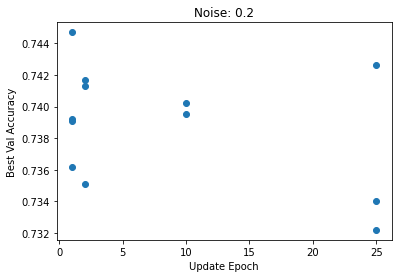

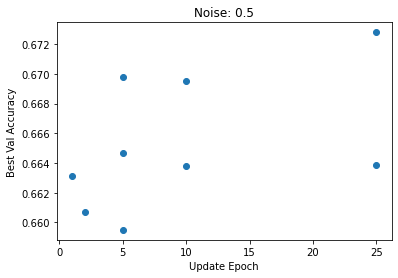

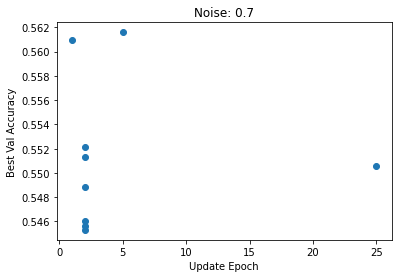

In [46]:
for noise in [0.0, 0.2, 0.5, 0.7]:
    plt.scatter(results.loc[results["noise"] == noise, "rank_update_epoch"], results.loc[results["noise"] == noise, "best_val_accuracy"])
    plt.xlabel("Update Epoch")
    plt.ylabel("Best Val Accuracy")
    # plt.xscale("log")
    plt.title(f"Noise: {noise}")
    plt.show()